In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('df_columnas_nuevas.csv')

In [3]:
pd.options.display.max_columns=None
df.head(2)

,Unnamed: 0,index,age,gender,pais,nivel_educativo,puesto_actual,experiencia_program,lenguaje_recomendado_inic,sector_actual,tamaño_empresa,equipo_data_tamaño,ML_uso,salario_anual,DA_usos,lenguajes_habitual,BD_usos,IE_usos,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",PostgreSQL,None,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may 

<AxesSubplot:xlabel='lenguaje_recomendado_inic', ylabel='count'>

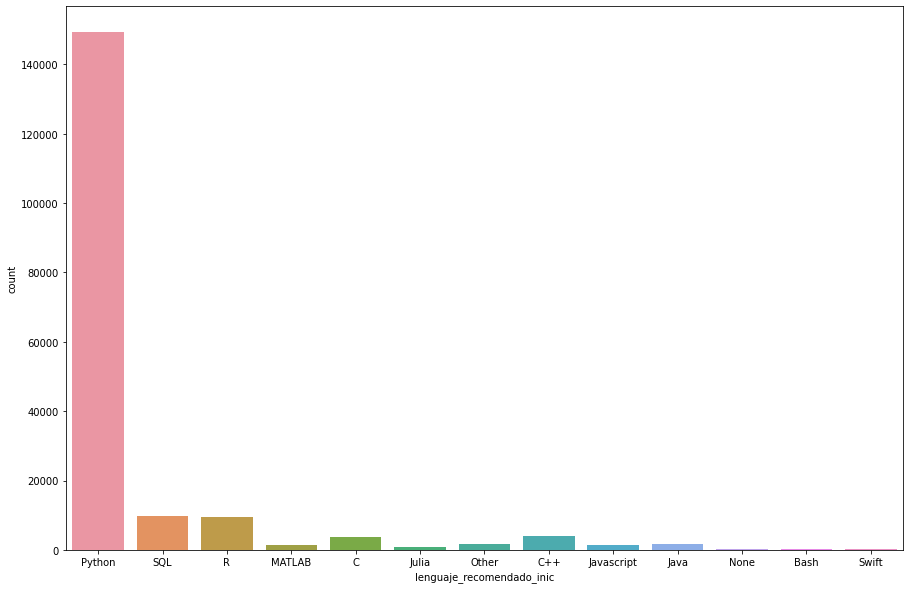

In [33]:
# QUE LENGUAJE RECOMIENDAS A PERSONAS QUE SE ESTEN INICIANDO ?

plt.figure(figsize=(15,10))
sns.countplot(data= df, x='lenguaje_recomendado_inic')

In [4]:
df=df.fillna("NAN")
df=df.astype('str')
df["Q36A"] = df[["Q36_A_Part_1","Q36_A_Part_2","Q36_A_Part_3","Q36_A_Part_4","Q36_A_Part_5","Q36_A_Part_6","Q36_A_Part_7","Q36_A_OTHER"]].agg('_'.join, axis=1)
df['Q36A'] = df['Q36A'].str.replace('NAN,', '')
df['Q36A'] = df['Q36A'].str.replace(',NAN', '')
df['Q36A'] = df['Q36A'].apply(lambda x: x.split('_'))

In [5]:
df = df.explode('Q36A')

In [6]:
df['Q36A'].unique()

array(['NAN', 'No / None',
       'Automated data augmentation (e.g. imgaug, albumentations)',
       'Automated feature engineering/selection (e.g. tpot, boruta',
       'py)',
       'Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)',
       'Automated model selection (e.g. auto-sklearn, xcessiv)',
       'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)',
       'Automated model architecture searches (e.g. darts, enas)',
       'Other'], dtype=object)

In [7]:
df=df.fillna("NAN")
df=df.astype('str')
df["Q38B"] = df[["Q38_B_Part_1", "Q38_B_Part_2", "Q38_B_Part_3", "Q38_B_Part_4", "Q38_B_Part_5", "Q38_B_Part_6", "Q38_B_Part_7", "Q38_B_Part_8", "Q38_B_Part_9", "Q38_B_Part_10", "Q38_B_Part_11", "Q38_B_OTHER"]].agg('_'.join, axis=1)
df['Q38B'] = df['Q38B'].str.replace('NAN,', '')
df['Q38B'] = df['Q38B'].str.replace(',NAN', '')
df['Q38B'] = df['Q38B'].apply(lambda x: x.split('_'))

In [8]:
df = df.explode('Q38B')

: 

: 

In [1]:
df['Q38B'].unique()

NameError: name 'df' is not defined

In [4]:
df=df.fillna("NAN")
df=df.astype('str')
df["Q29A"] = df[['Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3', 'Q29_A_Part_4', 'Q29_A_OTHER']].agg(','.join, axis=1)
df['Q29A'] = df['Q29A'].str.replace('NAN,', '')
df['Q29A'] = df['Q29A'].str.replace(',NAN', '')
df['Q29A'] = df['Q29A'].apply(lambda x: x.split(','))

In [6]:
df = df.explode('Q29A')


In [8]:
df['Q29A'].unique()

array([' Google Cloud Compute Engine ', 'NAN',
       ' Microsoft Azure Virtual Machines ', 'No / None',
       ' Amazon Elastic Compute Cloud (EC2) ', 'Other'], dtype=object)

In [28]:
df= df.apply(lambda x: x.replace('NAN', np.nan))

<AxesSubplot:xlabel='Q29A', ylabel='count'>

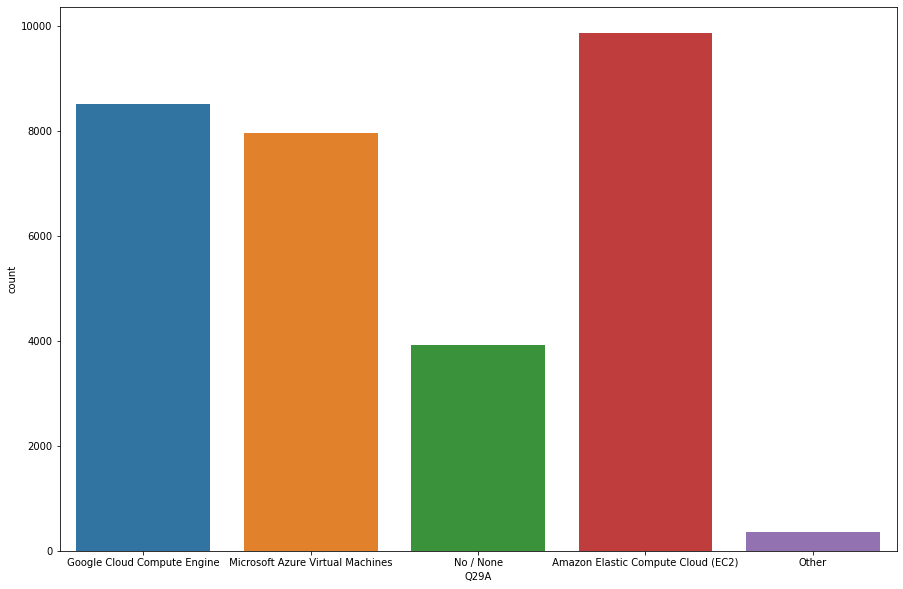

In [30]:
# USAS ALGUNAS DE ESTAS PLATAFORMAS DE LA NUBE? 

plt.figure(figsize=(15,10))
sns.countplot(data= df, x='Q29A')

In [12]:
df=df.fillna("NAN")
df=df.astype('str')
df["Q30A"] = df[["Q30_A_Part_1", "Q30_A_Part_2", "Q30_A_Part_3", "Q30_A_Part_4", "Q30_A_Part_5", "Q30_A_Part_6", "Q30_A_Part_7", "Q30_A_OTHER"]].agg(','.join, axis=1)
df['Q30A'] = df['Q30A'].str.replace('NAN,', '')
df['Q30A'] = df['Q30A'].str.replace(',NAN', '')
df['Q30A'] = df['Q30A'].apply(lambda x: x.split(','))

In [13]:
df = df.explode('Q30A')

In [14]:
df['Q30A'].unique()

array(['Google Cloud Storage (GCS)   ', 'NAN',
       'Microsoft Azure Data Lake Storage ', ' Google Cloud Filestore ',
       'No / None', ' Amazon Simple Storage Service (S3)  ',
       ' Amazon Elastic File System (EFS)  ',
       'Microsoft Azure Disk Storage ', 'Other'], dtype=object)

In [15]:
df=df.fillna("NAN")
df=df.astype('str')
df["Q31A"] = df[["Q31_A_Part_1", "Q31_A_Part_2", "Q31_A_Part_3", "Q31_A_Part_4", "Q31_A_Part_5", "Q31_A_Part_6", "Q31_A_Part_7", "Q31_A_Part_8", "Q31_A_Part_9", "Q31_A_OTHER"]].agg(','.join, axis=1)
df['Q31A'] = df['Q31A'].str.replace('NAN,', '')
df['Q31A'] = df['Q31A'].str.replace(',NAN', '')
df['Q31A'] = df['Q31A'].apply(lambda x: x.split(','))

In [16]:
df = df.explode('Q31A')

In [17]:
df['Q31A'].unique()

array(['No / None', 'NAN', ' DataRobot',
       ' Azure Machine Learning Studio ', ' Amazon SageMaker ', 'Other',
       ' Google Cloud Vertex AI', ' Databricks', ' Alteryx',
       ' Rapidminer', ' Dataiku'], dtype=object)

In [18]:
df=df.fillna("NAN")
df=df.astype('str')
df["27B_union"] = df[['Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3', 'Q27_B_Part_4','Q27_B_Part_5','Q27_B_Part_6', 'Q27_B_Part_7','Q27_B_Part_8','Q27_B_Part_9','Q27_B_Part_10','Q27_B_Part_11','Q27_B_OTHER']].agg(','.join, axis=1)
df['27B_union'] = df['27B_union'].str.replace('NAN,', '')
df['27B_union'] = df['27B_union'].str.replace(',NAN', '')
df['27B_union'] = df['27B_union'].apply(lambda x: x.split(','))

In [19]:
df =df.explode("27B_union")

In [20]:
df['27B_union'].unique()

array(['NAN', ' Google Cloud Platform (GCP) ', ' Oracle Cloud ',
       ' Amazon Web Services (AWS) ', ' Microsoft Azure ',
       ' VMware Cloud ', 'None', ' IBM Cloud / Red Hat ', ' SAP Cloud ',
       ' Salesforce Cloud ', ' Alibaba Cloud ', ' Tencent Cloud ',
       'Other'], dtype=object)

In [21]:
df=df.fillna("NAN")
df=df.astype('str')
df["29B_union"] = df[['Q29_B_Part_1', 'Q29_B_Part_2', 'Q29_B_Part_3', 'Q29_B_Part_4','Q29_B_OTHER']].agg(','.join, axis=1)
df['29B_union'] = df['29B_union'].str.replace('NAN,', '')
df['29B_union'] = df['29B_union'].str.replace(',NAN', '')
df['29B_union'] = df['29B_union'].apply(lambda x: x.split(','))

In [22]:
df =df.explode("29B_union")

In [23]:
df['29B_union'].unique()

array(['NAN', ' Google Cloud Compute Engine ',
       ' Microsoft Azure Virtual Machines ',
       ' Amazon Elastic Compute Cloud (EC2) ', 'None', 'Other'],
      dtype=object)

In [24]:
df=df.fillna("NAN")
df=df.astype('str')
df["31B_union"] = df[['Q31_B_Part_1', 'Q31_B_Part_2', 'Q31_B_Part_3', 'Q31_B_Part_4','Q31_B_Part_5','Q31_B_Part_6', 'Q31_B_Part_7','Q31_B_Part_8','Q31_B_Part_9','Q31_B_OTHER']].agg(','.join, axis=1)
df["31B_union"] = df["31B_union"].str.replace('NAN,', '')
df["31B_union"] = df["31B_union"].str.replace(',NAN', '')
df["31B_union"] = df["31B_union"].apply(lambda x: x.split(','))

In [25]:
df =df.explode("31B_union")

In [26]:
df['31B_union'].unique()

array(['NAN', 'None', ' Azure Machine Learning Studio ',
       ' Google Cloud Vertex AI', ' DataRobot', ' Amazon SageMaker ',
       ' Dataiku', ' Databricks', ' Rapidminer', 'Other', ' Alteryx'],
      dtype=object)

In [32]:
list(df.columns)

['Unnamed: 0',
 'index',
 'age',
 'gender',
 'pais',
 'nivel_educativo',
 'puesto_actual',
 'experiencia_program',
 'lenguaje_recomendado_inic',
 'sector_actual',
 'tamaño_empresa',
 'equipo_data_tamaño',
 'ML_uso',
 'salario_anual',
 'DA_usos',
 'lenguajes_habitual',
 'BD_usos',
 'IE_usos',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q18_Part_4',
 'Q18_Part_5',
 'Q18_Part_6',
 'Q18_OTHER',
 'Q19_Part_1',
 'Q19_Part_2',
 'Q19_Part_3',
 'Q19_Part_4',
 'Q19_Part_5',
 'Q19_OTHER',
 'Q27_A_Part_10',
 'Q27_A_Part_11',
 'Q27_A_OTHER',
 'Q29_A_Part_1',
 'Q29_A_Part_2',
 'Q29_A_Part_3',
 'Q29_A_Part_4',
 'Q29_A_OTHER',
 'Q30_A_Part_1',
 'Q30_A_Part_2',
 'Q30_A_Part_3',
 'Q30_A_Part_4',
 'Q30_A_Part_5',
 'Q30_A_Part_6',
 'Q30_A_Part_7',
 'Q30_A_OTHER',
 'Q31_A_Part_1',
 'Q31_A_Part_2',
 'Q31_A_Part_3',
 'Q31_A_Part_4',
 'Q31_A_Part_5',
 'Q31_A_Part_6',
 'Q31_A_Part_7',
 'Q31_A_Part_8',
 'Q31_A_Part_9',
 'Q31_A_OTHER',
 'Q36_A_Part_1',
 'Q36_A_Part_2',
 'Q36_A_Part_3',
 'Q36_A_Part_4',
 'Q36_